
# Project: Investigate a Dataset ( The Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
My objective for this project is to analyze [the Medical Appointment No Shows Dataset](https://www.kaggle.com/joniarroba/noshowappointments) and convey my findings using Python libraries NumPy, pandas, Matplotlib, and seaborn. 110k medical appointments were collected in Brazil for this dataset, which examines whether or not patients made it to their appointments.

## Data Description

PatientID-----------> The patient’s identification number

AppointmentID----> The appointment number of the patient 

Gender--------------> The Patient's Gender ( Male or Female)

ScheduledDay----->The Patients' appointment dates and times

AppointmentDay--> Patients were to arrive at their appointments at the specified time and date

Age------------------> The patient's age

Neighbourhood---> The hospital's location

Scholarship--------> Inclusion or exclusion of a patient from the Brazilian welfare program (1= True, 0 = False)

Hipertension-------> If the patient is hypertensive.(1= True, 0=False)

Diabetes------------> If the patient is diabetic. (1= True, 0=False)

Alcoholism---------> Whether the patient drinks alcohol. (1= True, 0=False)

Handcap-----------> If the patient is handicapped.(1= True, 0=False)

SMS_received---->if  the patient recieved SMS notification. (1= True, 0=False)

No-show-----------> If the patient showed up for their appointment.(1= True, 0=False)


## My questions to answer:

1.What percentage of those who show up for appointments vs those who don't?

2.What are the most important factors ('Age,' 'Special condition,' 'Having an SMS,' 'Gender,' 'Scholarship') to get the patient to his appointment?


In [2]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load my data:

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

#size of data
df.shape
#showing first five rows
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There are some errors in columns names and they should be corrected in specific form e.g., (_) instead of spaces

In [4]:

# showing data types of columns:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

patient_id data type should be int instead of float.

ScheduledDay and AppointmentDay are supposed to be date time so they should not be string i.e., objects

In [5]:
#checking for duplicates
df.duplicated().sum()

0

No dublication 

In [6]:
#checking for missing value:
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing values for any variable

In [7]:
# counting number of non-null unique values for each variable
df.nunique()


PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Looking at the difference between PatientId, AppointmentID and ScheduledDay may mean that there are some patients who have more than one appointment.
Counts for Scholarship, Hipertension, Diabetes , Alcoholism , Handcap , SMS_received ,and No-show(specifically) are low.

In [8]:
# to make sure if there are some patients have more than one appointment so I calculate here counts of PatientId

df['PatientId'].value_counts()


8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
2.584240e+11    62
                ..
2.367500e+11     1
1.744680e+14     1
7.978390e+12     1
5.595420e+13     1
1.557660e+13     1
Name: PatientId, Length: 61744, dtype: int64


Now we can see there are some patients have more than one appointment

In [9]:
#showing descritive statistics of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here is minus value for age which need to be fixed

## Cleaning and Fixing

### Rename columns

In [10]:

#Fixing errors of column names
df.rename(columns = {'PatientId':'Patient_Id','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.head()

,Patient_Id,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Fixing data type

In [11]:
#Fixing data type of Patient_Id

df['Patient_Id']=df['Patient_Id'].apply(np.int64)
df['Patient_Id'].dtypes

dtype('int64')

In [12]:
#Fixing data type of Scheduled_Day and Appointment_Day:

#Scheduled_Day

df['Scheduled_Day']=pd.to_datetime(df['Scheduled_Day'])
df['Scheduled_Day'].dtypes
#Appointment_Day
df['Appointment_Day']=pd.to_datetime(df['Appointment_Day'])
df['Appointment_Day'].dtypes

datetime64[ns, UTC]

### Fixing incorrect data

In [13]:
# finding if there is zero values in Age variable as well as negative ones:

Age=df[df["Age"] <= 0]

Age


,Patient_Id,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
59,71844300000000,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,236623000000000,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517000000000,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271882000000000,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,86471300000000,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395000000000,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5577530000000,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,614246000000,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,43218500000000,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [14]:
#Fixing ages that are <= 0 
df.drop(Age.index, inplace=True)
df[df["Age"] <= 0]

,Patient_Id,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


All zero and neative values are dropped

### Handling data

In [15]:
#reassigning the values of the no_show column to 0 or 1 instead of No or yes to prevent confusion
df['No_show']= df['No_show'].replace(["No"], 1)
df['No_show']= df['No_show'].replace(["Yes"], 0)

#to confirm the change
df.No_show.value_counts()

1    85307
0    21680
Name: No_show, dtype: int64

In [16]:
#adding column for showed and not showed to use in plots
showed = df['No_show'] == 1
not_showed = df['No_show'] ==0
df['showed'] = showed
df['not_showed'] = not_showed
df.head()

,Patient_Id,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
0,29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,True,False
1,558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,True,False
2,4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,True,False
3,867951000000,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,True,False
4,8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,True,False


<a id='eda'></a>
## Exploratory Data Analysis

### Q1 (What percentage of those who show up for appointments vs those who don't?)

79.73585575817623


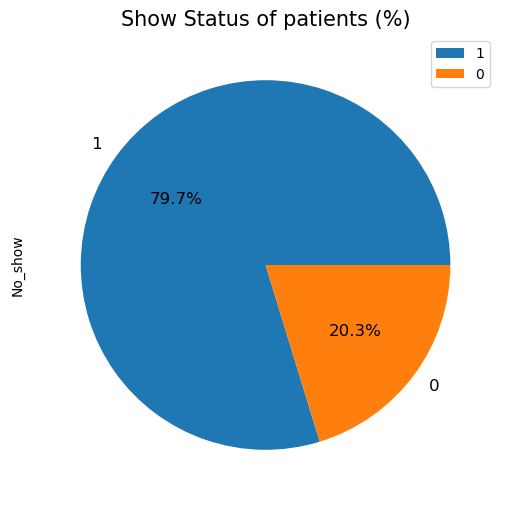

In [17]:
allP = df['No_show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(6,6), autopct='%2.1f%%', fontsize = 12);
pieChart.set_title("Show Status of patients (%)", fontsize = 15);
plt.legend();


Most patients showed up for their appointments (79.8%) while (20.3%)did not show up.

###  Q2  (What are the most important factors ('Age,' 'Special condition,' 'Having an SMS,' 'Gender,' 'Scholarship') to get the patient to his appointment?)

#### To assess the age as predictor variable:

In [18]:

#mean of age of who showed
df.Age[showed].mean()
#mean of age who do not showed
df.Age[not_showed].mean()


35.329151291512915

In [19]:
def label(x, y , t):
    """
    Args:
    x(str) :showed
    y(str) :Age
    t(str):Age of people who showed
    
    Returns:
    None
    """
    plt.figure(figsize = [4, 3])
    plt.hist(df.groupby('Age')['showed'].mean(),alpha=.9,bins=26,label='show');
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

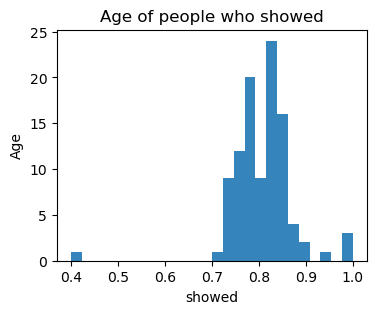

In [20]:

label("showed","Age" ,"Age of people who showed")


Here we can see obvious difference of ages regarding showed rate

#### Assessing the special conditions as predector factors 

In [21]:
# total number of special conditions for each patient
df['number_of_conditions'] = df.Hypertension + df.Diabetes + df.Alcoholism + df.Handicap

# empty dictionary 
conditions_dict = {}

#  no show patientspercentage who had hypertension only
conditions_dict['Hypertension'] = (df[df.number_of_conditions <= 1].groupby('Hypertension').No_show.mean() * 100)[1]
# no show patients percentage who had  diabetes only
conditions_dict['Diabetes'] = (df[df.number_of_conditions <= 1].groupby('Diabetes').No_show.mean() * 100)[1]
# no show patients percentage who had alcoholism only
conditions_dict['Alcoholism'] = (df[df.number_of_conditions <= 1].groupby('Alcoholism').No_show.mean() * 100)[1]
# no show patients percentage who had handicapped only
conditions_dict['Handicapped'] = (df[df.number_of_conditions <= 1].groupby('Handicap').No_show.mean() * 100)[1]

# no show patients percentage who had multiple conditions
conditions_dict['Multiple Conditions'] = df[df.number_of_conditions > 1].No_show.mean() * 100

conditions_dict

{'Hypertension': 82.9832394056942,
 'Diabetes': 79.64205816554811,
 'Alcoholism': 78.35587929240374,
 'Handicapped': 79.85280588776449,
 'Multiple Conditions': 82.34103357942367}

In [22]:
# converting the dictionary to a pandas series
cond_series = pd.Series(conditions_dict)
# sorting the values in descending order
cond_series.sort_values(ascending=False, inplace=True)
cond_series

Hypertension           82.983239
Multiple Conditions    82.341034
Handicapped            79.852806
Diabetes               79.642058
Alcoholism             78.355879
dtype: float64

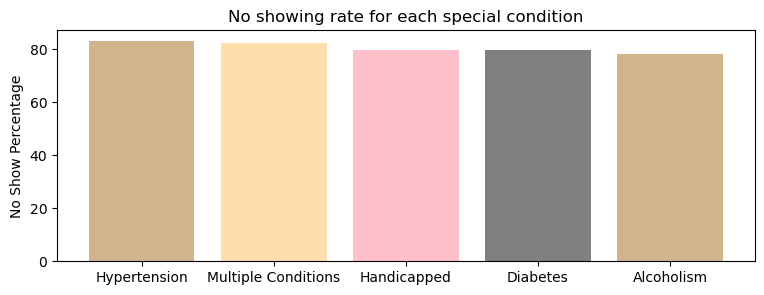

In [23]:
# plot a bar chart
plt.figure(figsize = [9, 3])
plt.bar(x = cond_series.index, height = cond_series,color= ['tan','navajowhite','pink','gray'])
plt.title('No showing rate for each special condition')
plt.ylabel('No Show Percentage');


As demonstrated here there are small differences between the percentage of each condition.

In [24]:
#we can assess Relationship between Hypertension and No show percentage since it has the highest percentage in the previous plot
def label(x, y , t):
    """
    Args:
    x:['No SMS_received','SMS_received']
    y(str) :Age
    t(str):Age of people who showed
    
    Returns:
    None
    """
    plt.figure(figsize = [4, 3])
    hypertension_mean = df['Hypertension'].groupby(df['No_show']).mean()
    plt.scatter(df['Hypertension'],df['No_show'],alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()


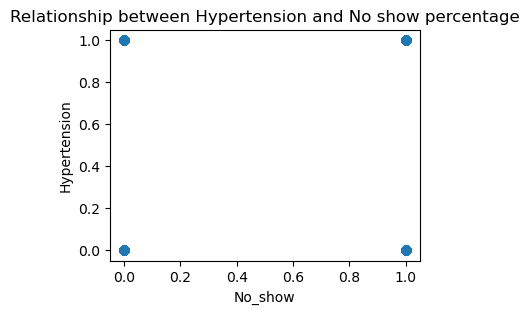

In [25]:

label('No_show','Hypertension' ,'Relationship between Hypertension and No show percentage')

As shown now there relationship here between Hypertension and No show percentage 

In [26]:
# assessing the relationship between Hypertension and age
def label(x, y , t):
    """
    Args:
    x:['No SMS_received','SMS_received']
    y(str) :Age
    t(str):Age of people who showed
    
    Returns:
    None
    """
    plt.figure(figsize = [4, 3])
    hypertension_mean = df['Hypertension'].groupby(df['Age']).mean()
    plt.scatter(df['Hypertension'],df['Age'],alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()


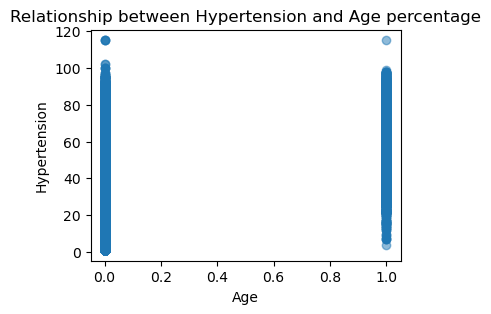

In [27]:
label('Age','Hypertension' ,'Relationship between Hypertension and Age percentage')

As showen here there is no relationship as well

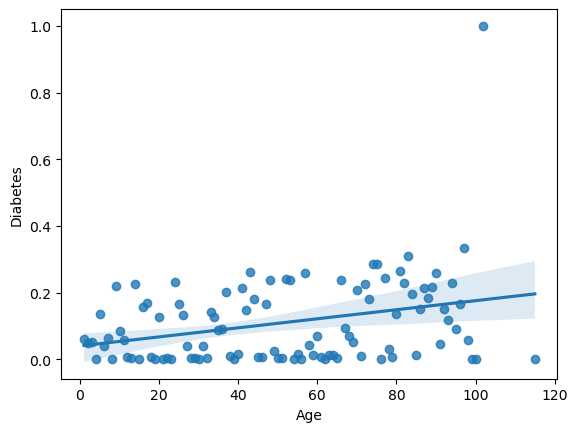

In [28]:
# age diabetes relationship
# there are more people with diabetes among older patients
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel('Age')
plt.show()


In [197]:
def label(x, y , t):
    """
    Args:
    x:['No SMS_received','SMS_received']
    y(str) :Age
    t(str):Age of people who showed
    
    Returns:
    None
    """
    plt.figure(figsize = [4, 3])
    no_show_perc_SMS_received = df.groupby('SMS_received').No_show.mean()*100
    plt.bar(x = no_show_perc_SMS_received.index, height = no_show_perc_SMS_received ,color= ['pink', 'gray'],width = 0.7 );
    plt.xticks([0, 1],x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

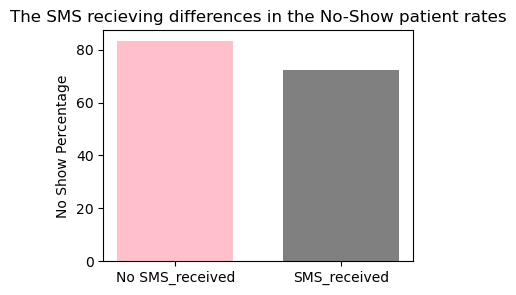

In [198]:
#assessing Recieving SMS as predicting variable:
label(['No SMS_received', 'SMS_received'],'No Show Percentage','The SMS recieving differences in the No-Show patient rates')


Here we can also see  20 % as a difference between people with and without SMS recieving regarding no showing up.

In [165]:
# assessing no show patients percentage based on gender
def label(x, y , t):
    """
    Args:
    x:['No SMS_received','SMS_received']
    y(str) :Age
    t(str):Age of people who showed
    
    Returns:
    None
    """
    plt.figure(figsize = [4, 3])
    no_show_perc_gender = df.groupby('Gender').No_show.mean() * 100
    plt.bar(x = no_show_perc_gender.index, height= no_show_perc_gender,color=['pink', 'gray'],width = 0.7)
    plt.xticks([0, 1],x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

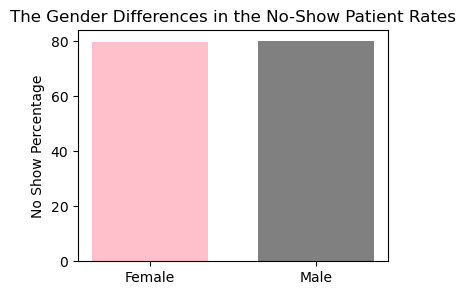

In [166]:

label(['Female', 'Male'] ,'No Show Percentage','The Gender Differences in the No-Show Patient Rates' )


Here we can see almost no difference between females and males regarding missing the appoinment.

In [167]:
# assessing scholarship as predictor variable
def label(x, y , t):
    """
    Args:
    x:['No SMS_received','SMS_received']
    y(str) :Age
    t(str):Age of people who showed
    
    Returns:
    None
    """
    plt.figure(figsize = [4, 3])
    no_show_perc_scholarship = df.groupby('Scholarship').No_show.mean() * 100
    plt.bar(x = no_show_perc_scholarship.index, height = no_show_perc_scholarship ,color= ['pink', 'gray'])
    plt.xticks([0, 1],x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

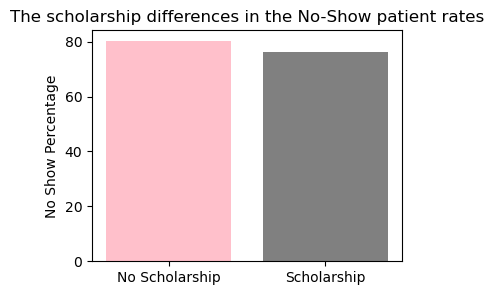

In [168]:
label(['No Scholarship', 'Scholarship'],'No Show Percentage', 'The scholarship differences in the No-Show patient rates')

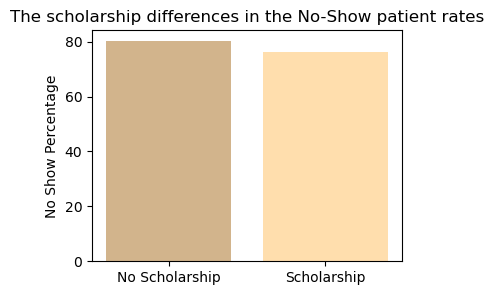

In [254]:
# assessing scholarship as predictor variable
no_show_perc_scholarship = df.groupby('Scholarship').No_show.mean() * 100

# plot a bar chart
plt.figure(figsize = [4, 3])
plt.bar(x = no_show_perc_scholarship.index, height = no_show_perc_scholarship ,color= ['tan','navajowhite'])
plt.title('The scholarship differences in the No-Show patient rates')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');

Here we can see less than 5% as difference between people with and without scholarship regarding no showing up.

<a id='conclusions'></a>
## Conclusions

1. Almost 20% of the patients didn't show up for their appointments.
2. Age are one of the most important predictor variables.
3. Among other patients with particular diseases, alcoholics are the most prone to miss their appointments but we can not depend on it as a preditor variable.
4. Gender acn not be used a predictor variable.
5. A patient who has received a scholarship is more likely to miss their appointment.

## limitations:
1. We need assess more features that can affect the showing up rate e.g., economic status , educational level.
2. We need more data thata cover wider area and are up to date.

